# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [1]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [2]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        # YOUR CODE HERE      
        
        positions[0]=self.pos
        for i in range(1,n+1):
            positions[i]=self.pickStep()+positions[i-1]
            
                
        
        
        return positions



In [3]:
print(pos_test)

NameError: name 'pos_test' is not defined

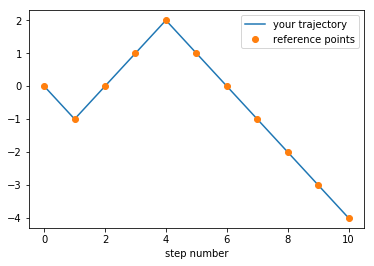

In [4]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

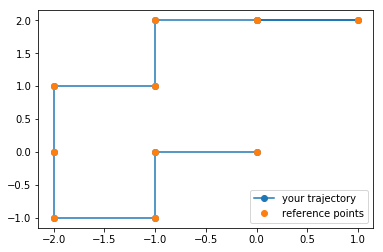

In [5]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

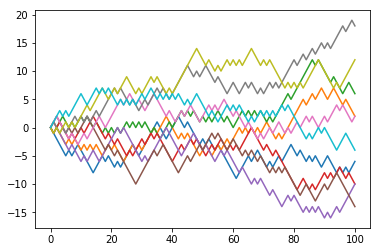

In [6]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


[1257.72]


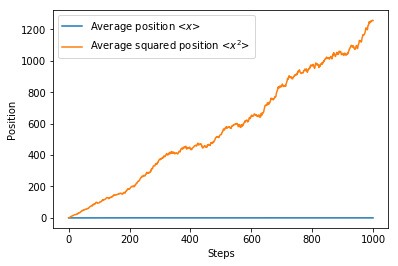

In [7]:
nsteps = 1000
ndim = 1
nwalkers = 100

positions=[]
avgpos=[]
squaredposition=[0]

for i in range(nwalkers):
    positions=w.doSteps(1000)
    squaredposition=(w.doSteps(1000))**2+squaredposition


avgpos=positions/100

averagesquaredposition=squaredposition/100
print(max(averagesquaredposition))

ns=numpy.arange(0,1001)

plt.plot(ns,avgpos,label='Average position <$x$>')
plt.plot(ns,averagesquaredposition,label='Average squared position <$x^2$>')
plt.xlabel('Steps')
plt.ylabel('Position')
plt.legend()

#positions=numpy.ndarray((nsteps+1,ndim),dtype='f')
#positions[0]=0
#for j in range(0,nwalkers):
#    for i in range(1,nsteps):
#        positions[i]=w.doSteps(nsteps)[i]
#avgpos=positions/nwalkers
#print(avgpos)
#return avgpos

        

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


In [12]:
w.ndim=2
squaredposition2=numpy.empty([101,2])
position2=numpy.empty([101])


for i in range(0,400):
    x=w.doSteps(100)[:,0]
    y=w.doSteps(100)[:,1]
    squaredposition2[:,0]+=x**2
    squaredposition2[:,1]+=y**2
    position2=squaredposition2[:,0]+squaredposition2[:,1]
    asp2=position2/400

print(squaredposition2[:,0])
print(max(squaredposition2[:,0]))
print(asp2)

[6.93425059e-310 4.00000000e+002 2.39200000e+003 1.32000000e+003
 1.74400000e+003 2.08800000e+003 2.30000000e+003 2.72000000e+003
 3.12400000e+003 3.64800000e+003 4.28400000e+003 4.44000000e+003
 4.98800000e+003 5.37600000e+003 5.72400000e+003 6.24800000e+003
 6.72800000e+003 7.02400000e+003 7.44400000e+003 7.98400000e+003
 8.25200000e+003 8.73600000e+003 8.92000000e+003 9.49600000e+003
 9.62400000e+003 9.93600000e+003 1.03920000e+004 1.06320000e+004
 1.10320000e+004 1.14720000e+004 1.22600000e+004 1.24160000e+004
 1.27920000e+004 1.31360000e+004 1.36680000e+004 1.39840000e+004
 1.41000000e+004 1.38720000e+004 1.42760000e+004 1.48880000e+004
 1.50120000e+004 1.58000000e+004 1.62800000e+004 1.69600000e+004
 1.74480000e+004 1.78160000e+004 1.80800000e+004 1.84240000e+004
 1.85680000e+004 1.86320000e+004 1.88920000e+004 1.95360000e+004
 2.62395837e+179 2.62395837e+179 2.62395837e+179 2.62395837e+179
 2.17840000e+004 2.26000000e+004 2.32480000e+004 2.41040000e+004
 2.47160000e+004 2.539200

101
[  0.     2.     3.94   6.02   8.03   9.96  11.91  14.1   16.27  18.28
  20.62  22.82  24.59  27.14  29.03  30.7   33.06  35.84  37.68  39.34
  41.47  43.76  46.42  47.4   48.52  50.28  51.76  53.    54.52  56.26
  57.25  59.18  61.63  64.66  67.59  69.82  71.39  73.12  76.3   76.08
  77.47  79.32  81.34  82.9   86.73  89.26  90.19  91.34  92.27  94.3
  95.58  96.94  98.13 100.8  103.56 108.2  112.07 114.24 117.58 119.92
 122.95 126.12 126.65 130.38 134.72 137.5  139.64 141.76 144.11 146.
 148.08 148.72 150.4  153.12 155.56 157.22 158.51 160.72 166.   167.04
 169.2  171.92 173.72 176.34 177.15 177.44 180.83 183.16 183.16 184.44
 185.57 187.22 190.98 194.36 195.74 197.76 199.78 202.14 202.63 204.02
 207.28]


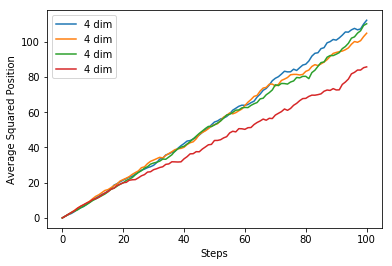

In [17]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)

avgpos=[]
position=numpy.zeros([101])
position2=numpy.zeros([101])
position3=numpy.zeros([101])
position4=numpy.zeros([101])
squaredposition=numpy.zeros([101,1])
squaredposition2=numpy.zeros([101,2])
squaredposition3=numpy.zeros([101,3])
squaredposition4=numpy.zeros([101,4])

for i in range(nwalkers):
    squaredposition=(w.doSteps(100))**2+squaredposition

    asp=squaredposition/400
    
w.ndim=2
for i in range(nwalkers):
    squaredposition2[:,0]=(w.doSteps(100)[:,0])**2+squaredposition2[:,0]
    squaredposition2[:,1]=(w.doSteps(100)[:,1])**2+squaredposition2[:,1]
    position2=squaredposition2[:,0]+squaredposition2[:,1]
    asp2=position2/400
print(len(position2))

w.ndim=3
for i in range(nwalkers):
    squaredposition3[:,0]=(w.doSteps(100)[:,0])**2+squaredposition3[:,0]
    squaredposition3[:,1]=(w.doSteps(100)[:,1])**2+squaredposition3[:,1]
    squaredposition3[:,2]=(w.doSteps(100)[:,2])**2+squaredposition3[:,2]
    position2=squaredposition2[:,0]+squaredposition2[:,1]
    asp3=squaredposition3/400
    
w.ndim=4    
for i in range(nwalkers):
    squaredposition4[:,0]=(w.doSteps(100)[:,0])**2+squaredposition4[:,0]
    squaredposition4[:,1]=(w.doSteps(100)[:,1])**2+squaredposition4[:,1]
    squaredposition4[:,2]=(w.doSteps(100)[:,2])**2+squaredposition4[:,2]
    squaredposition4[:,3]=(w.doSteps(100)[:,3])**2+squaredposition4[:,3]
    asp4=squaredposition4/400

ns=numpy.arange(0,101)    

#plt.plot(ns,asp,label='1 dim')
#plt.plot(ns,asp2,label='2 dim')
#plt.plot(ns,asp3,label='3 dim')
plt.plot(ns,asp4,label='4 dim')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average Squared Position')
print(asp2)

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


In [ ]:
ndim=2
nwalkers=500

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))

# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))
for i, nsteps in enumerate([10,100,500]):
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title("plot {} ".format(i+1))    
    plt.scatter(rand_pos[:,0], rand_pos[:,1], alpha=0.1)